<a href="https://colab.research.google.com/github/aseelhatem2/Data-Analyze-GSG/blob/main/Auto_MPG_Prediction_(Comparing_Top_ML_Algorithms).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')


In [31]:
df = pd.read_csv('/content/auto-mpg.csv')

df.drop(['car name'], axis=1, inplace=True)
display(df.head())

target = 'mpg'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1



Inference: The Datset consists of 8 features & 398 samples.


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [33]:
df.nunique().sort_values()


,0
origin,3
cylinders,5
model year,13
displacement,82
horsepower,94
acceleration,95
mpg,129
weight,351


In [34]:
display(df.describe())


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [35]:
nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 4 numerical & 3 categorical features.


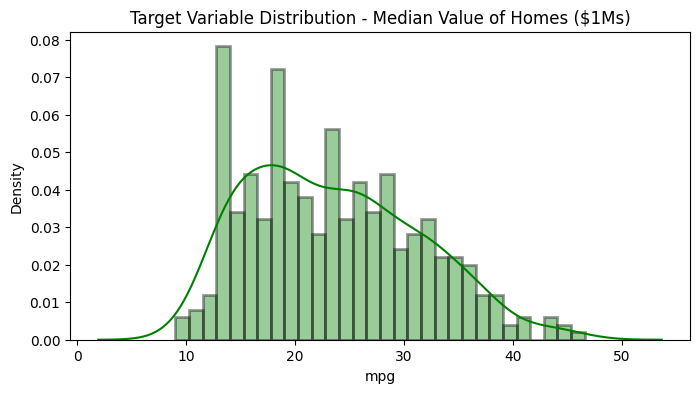

In [36]:
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

                               Visualising Categorical Features:                                


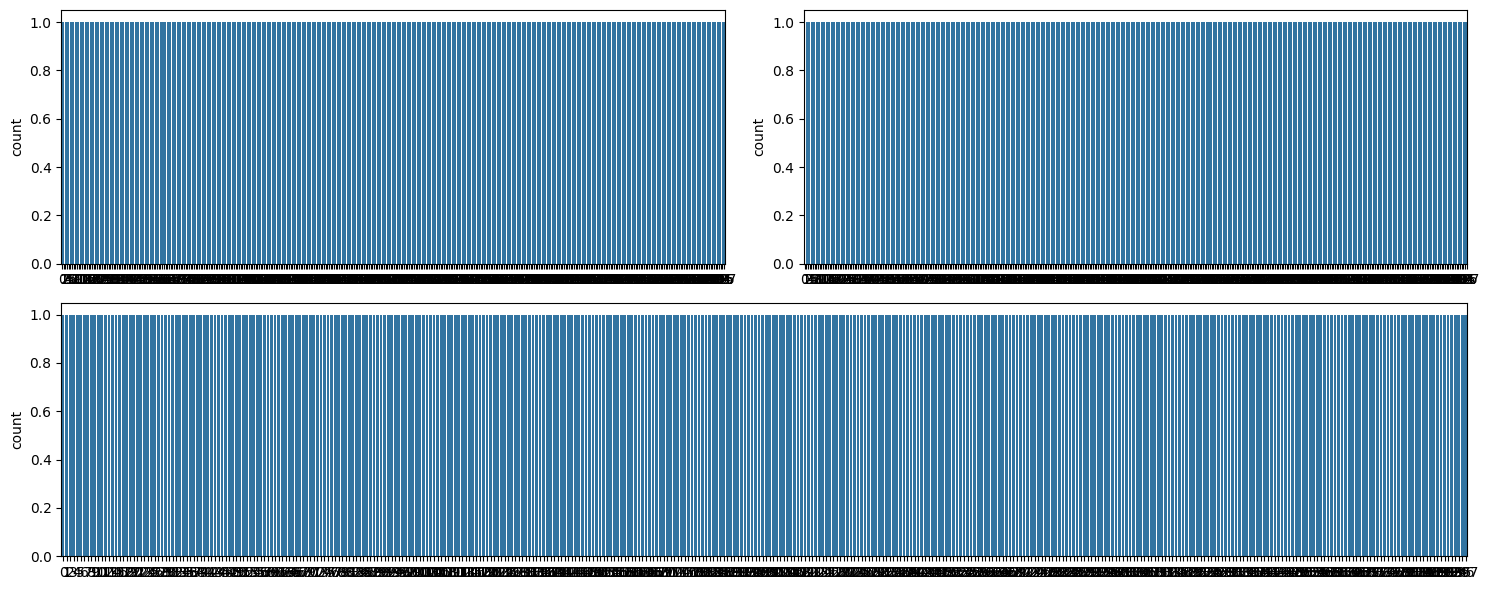

In [37]:
print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(2,1,2)
        sns.countplot(df[cf[i]])

plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


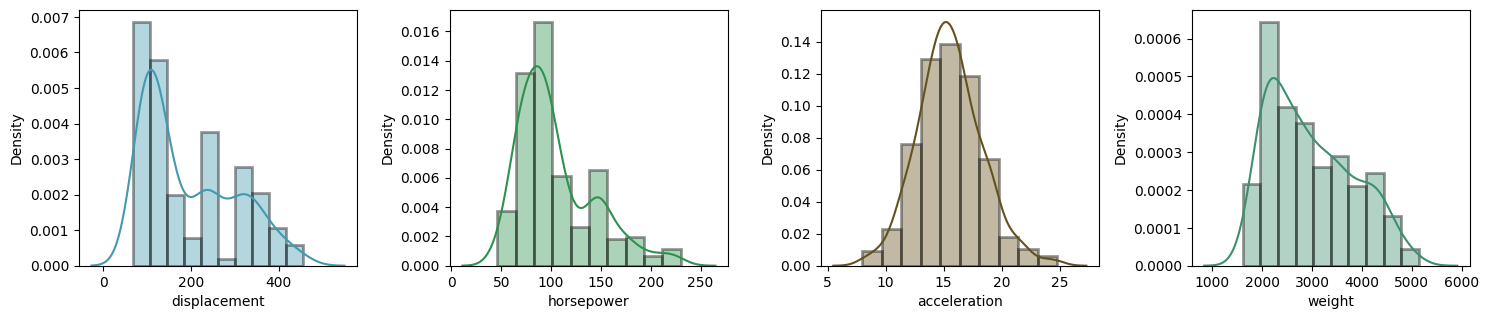

In [38]:
print('\033[1mNumeric Features Distribution'.center(130))

n=4
df = df[~df['horsepower'].isin(['?'])]
df.reset_index(drop=True, inplace=True)
df['horsepower']= df['horsepower'].astype(int)

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

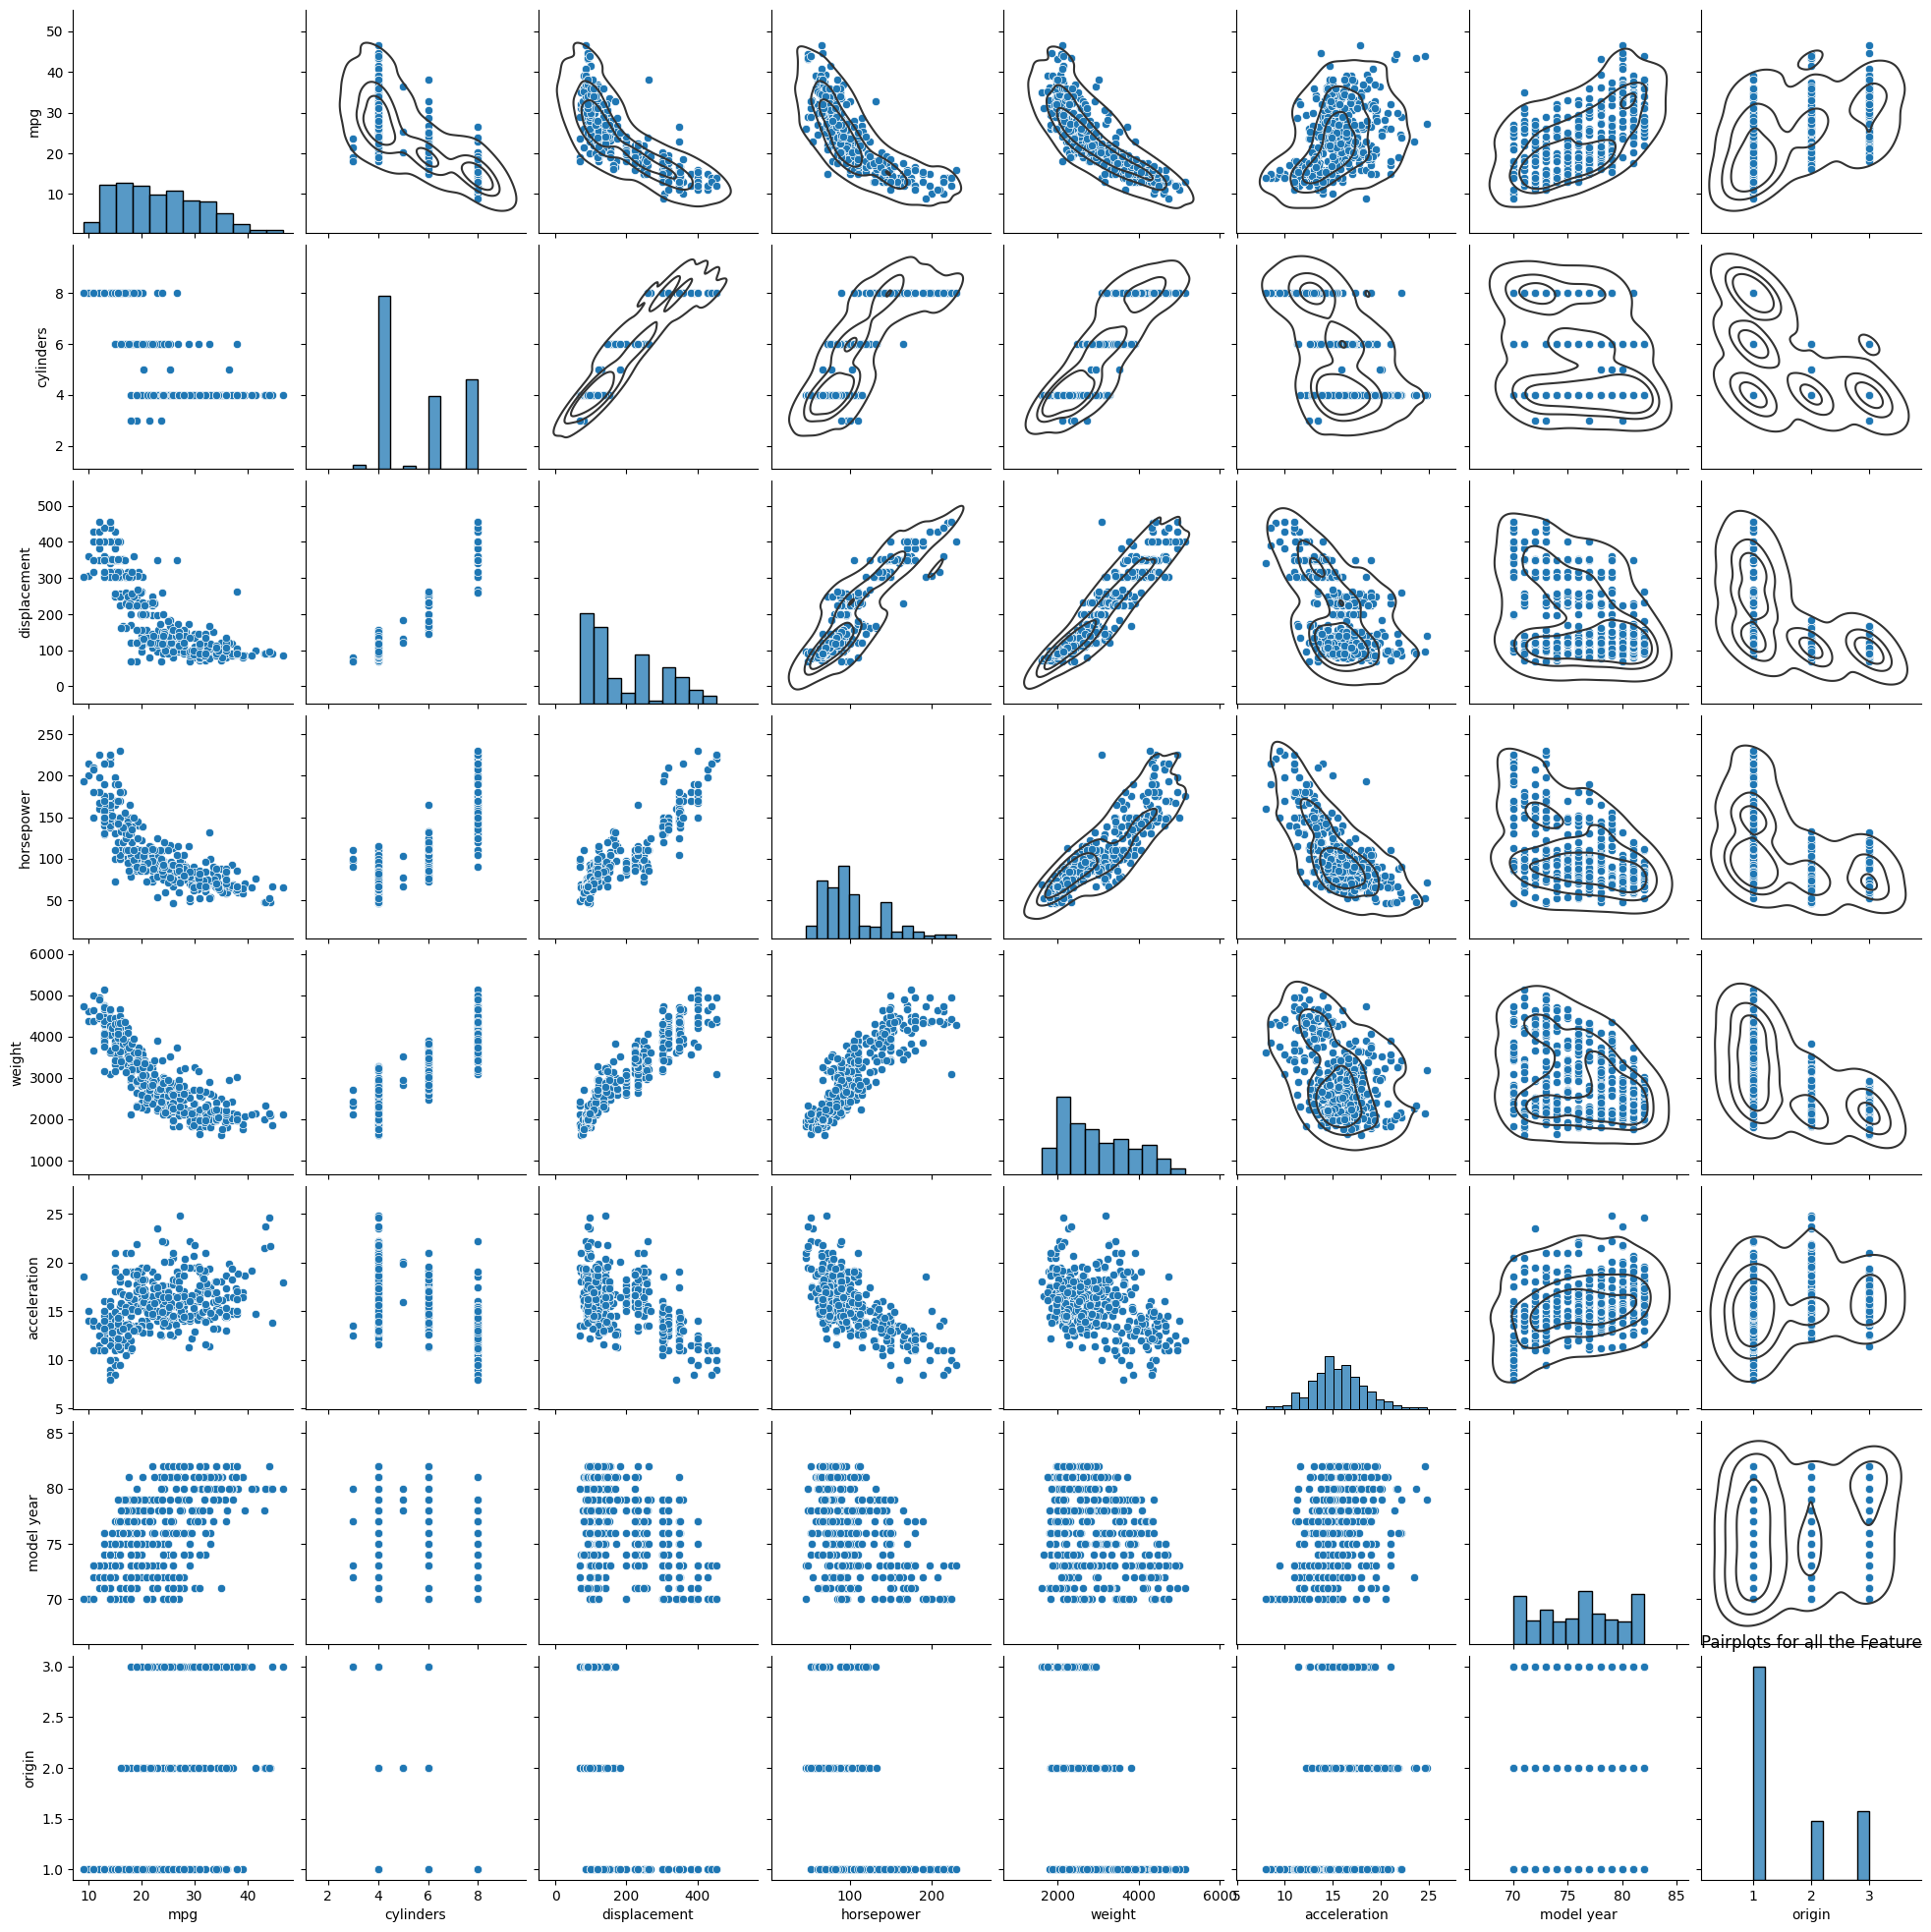

In [ ]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [39]:
counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 6


In [ ]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
mpg                           0         0.0
cylinders                     0         0.0
displacement                  0         0.0
horsepower                    0         0.0
weight                        0         0.0
acceleration                  0         0.0
model year                    0         0.0
origin                        0         0.0


In [ ]:
df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

df3.shape


Dummy Encoding on features:
origin
cylinders
model year


(392, 23)

In [ ]:
df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,mpg,displacement,horsepower,weight,acceleration,origin_2,origin_3,cylinders_4,cylinders_5,cylinders_6,...,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,307.0,130,3504,12.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,350.0,165,3693,11.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,18.0,318.0,150,3436,11.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,16.0,304.0,150,3433,12.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,17.0,302.0,140,3449,10.5,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Inference:
Before removal of outliers, The dataset had 392 samples.
After removal of outliers, The dataset now has 373 samples.


In [ ]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (392, 7) (392,) 
Training set  --->  (313, 7) (313,) 
Testing set   --->  (79, 7)  (79,)


In [ ]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02
mean,-2.837631e-17,1.021547e-16,2.837631e-17,2.270105e-17,-2.553868e-16,8.931443e-16,-1.191805e-16
std,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00
min,-1.414038e+00,-1.187676e+00,-1.512177e+00,-1.590222e+00,-2.732919e+00,-1.611062e+00,-7.271807e-01
25%,-8.309104e-01,-8.331200e-01,-7.625712e-01,-8.639148e-01,-6.320800e-01,-8.097977e-01,-7.271807e-01
50%,-8.309104e-01,-4.881463e-01,-2.714502e-01,-2.786039e-01,-1.631697e-02,-8.533169e-03,-7.271807e-01
75%,1.501600e+00,1.054653e+00,6.590947e-01,7.202161e-01,5.632248e-01,7.927314e-01,4.899720e-01
max,1.501600e+00,2.520791e+00,3.243942e+00,2.419276e+00,3.352269e+00,1.593996e+00,1.707125e+00



                                          Standardardization on Testing set                                          


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.136048,0.117498,-0.004131,0.131951,-0.006689,-0.069389,-0.126308
std,0.965366,1.008247,0.974352,1.024866,0.996458,0.914232,0.890450
min,-1.414038,-1.168511,-1.150298,-1.368657,-2.551812,-1.611062,-0.727181
25%,-0.830910,-0.833120,-0.736723,-0.868062,-0.668301,-0.809798,-0.727181
50%,0.335345,0.077227,-0.323147,0.174005,-0.088760,-0.008533,-0.727181
75%,1.501600,0.661766,0.348913,0.893203,0.527003,0.525643,0.489972
max,1.501600,2.377052,2.856215,2.588709,2.410514,1.593996,1.707125


In [41]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (392, 7) (392,) 
Training set  --->  (313, 7) (313,) 
Testing set   --->  (79, 7)  (79,)


In [42]:
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02,3.130000e+02
mean,-2.837631e-17,1.021547e-16,2.837631e-17,2.270105e-17,-2.553868e-16,8.931443e-16,-1.191805e-16
std,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00,1.001601e+00
min,-1.414038e+00,-1.187676e+00,-1.512177e+00,-1.590222e+00,-2.732919e+00,-1.611062e+00,-7.271807e-01
25%,-8.309104e-01,-8.331200e-01,-7.625712e-01,-8.639148e-01,-6.320800e-01,-8.097977e-01,-7.271807e-01
50%,-8.309104e-01,-4.881463e-01,-2.714502e-01,-2.786039e-01,-1.631697e-02,-8.533169e-03,-7.271807e-01
75%,1.501600e+00,1.054653e+00,6.590947e-01,7.202161e-01,5.632248e-01,7.927314e-01,4.899720e-01
max,1.501600e+00,2.520791e+00,3.243942e+00,2.419276e+00,3.352269e+00,1.593996e+00,1.707125e+00



                                          Standardardization on Testing set                                          


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.136048,0.117498,-0.004131,0.131951,-0.006689,-0.069389,-0.126308
std,0.965366,1.008247,0.974352,1.024866,0.996458,0.914232,0.890450
min,-1.414038,-1.168511,-1.150298,-1.368657,-2.551812,-1.611062,-0.727181
25%,-0.830910,-0.833120,-0.736723,-0.868062,-0.668301,-0.809798,-0.727181
50%,0.335345,0.077227,-0.323147,0.174005,-0.088760,-0.008533,-0.727181
75%,1.501600,0.661766,0.348913,0.893203,0.527003,0.525643,0.489972
max,1.501600,2.377052,2.856215,2.588709,2.410514,1.593996,1.707125


                                       Correlation Matrix                                       


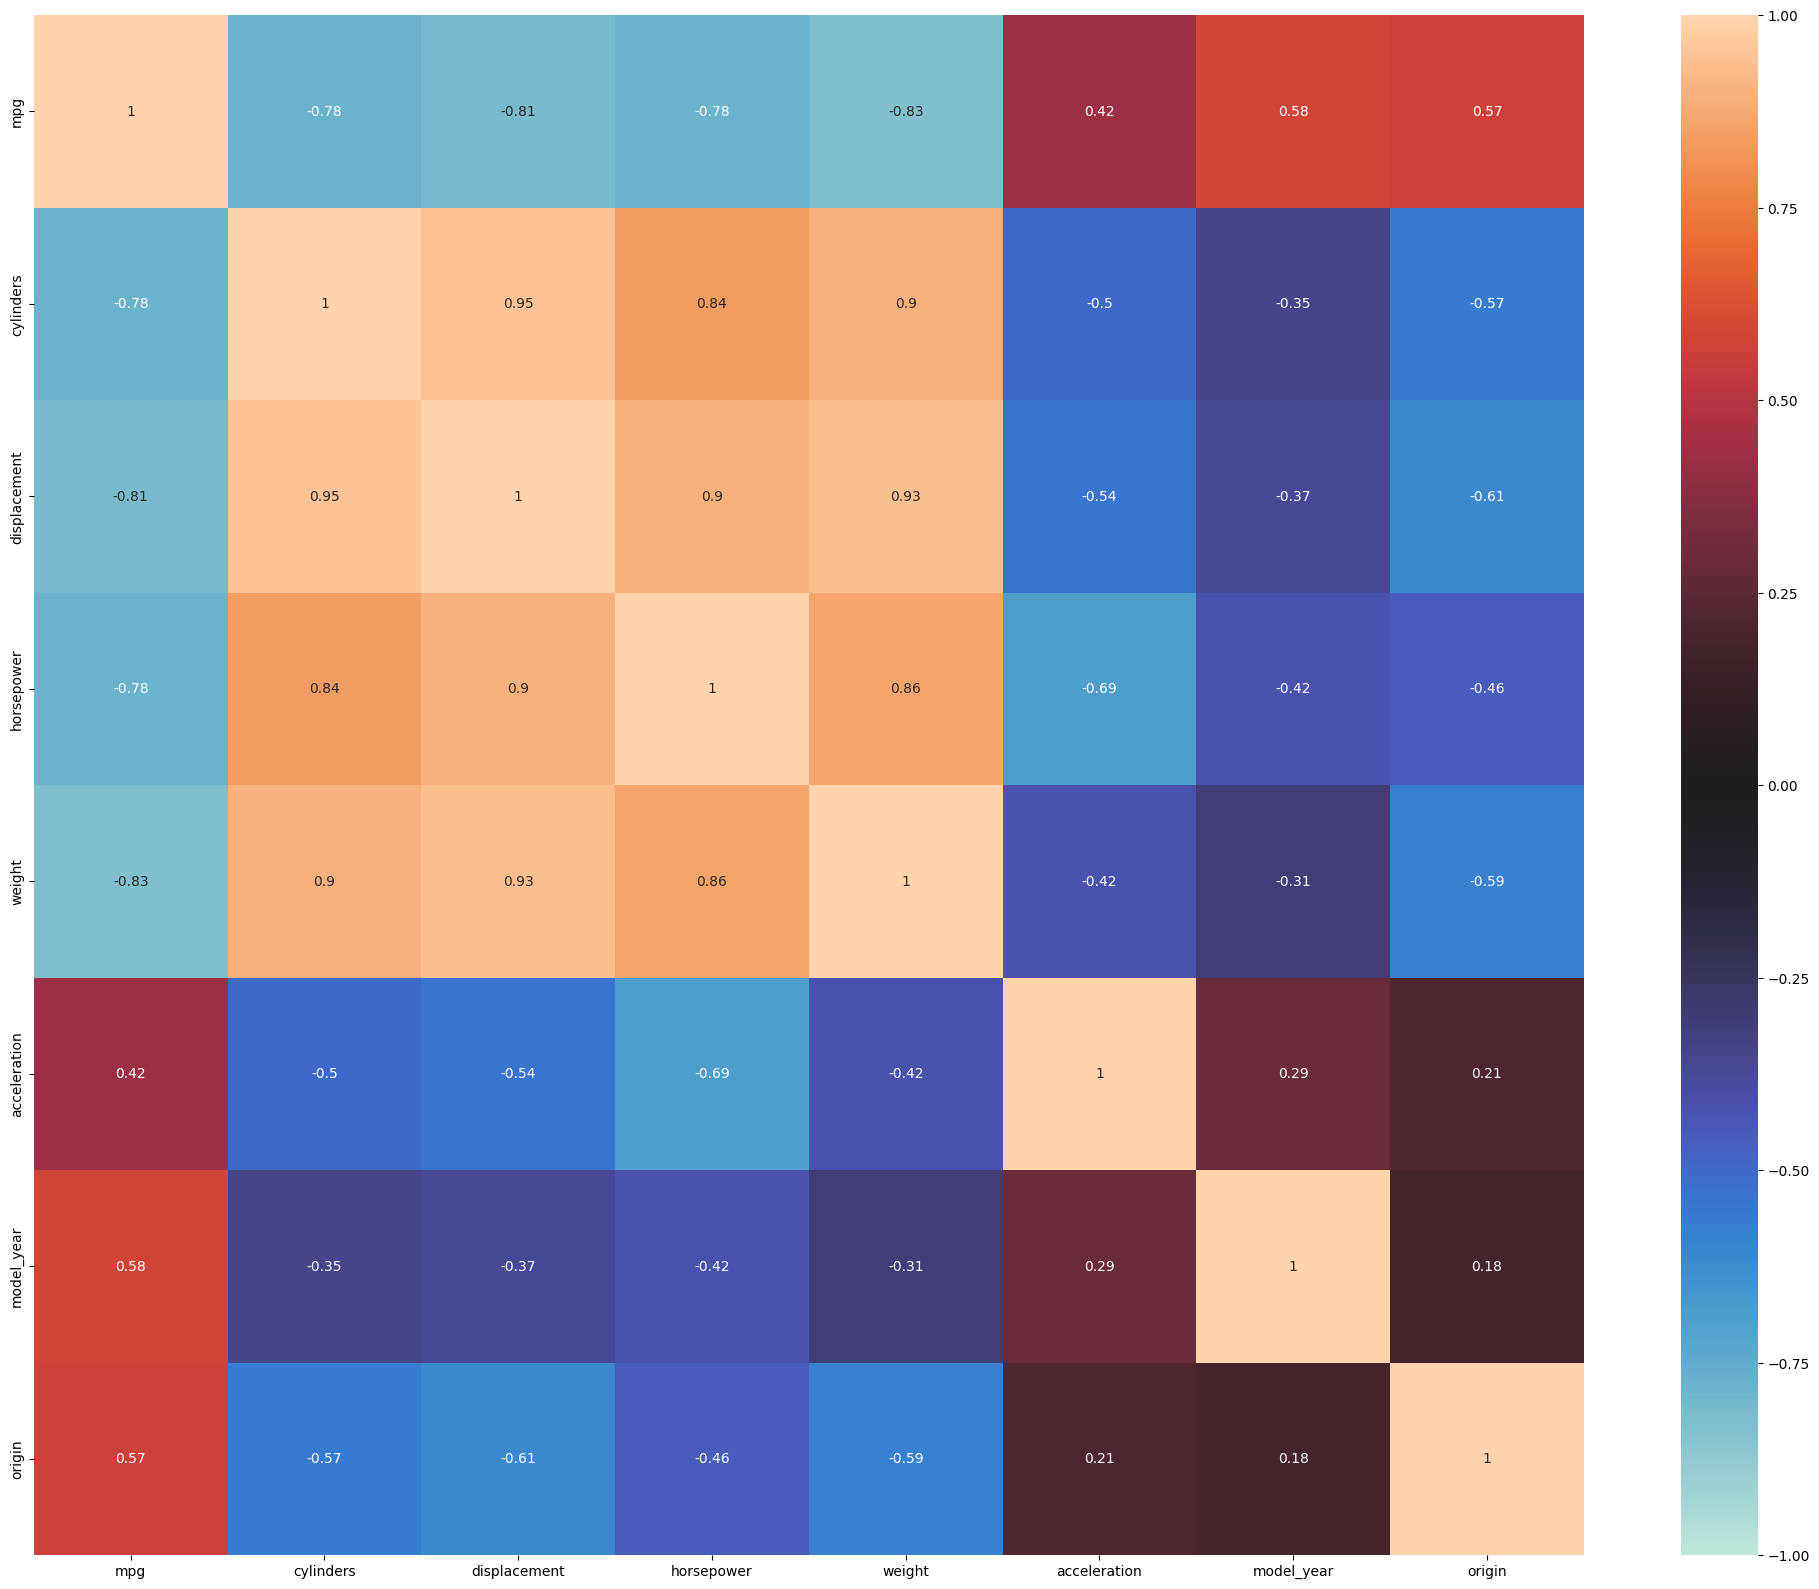

In [43]:
print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [44]:
Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          1.87e-110
Time:                        16:58:21   Log-Likelihood:                -822.68
No. Observations:                 313   AIC:                             1661.
Df Residuals:                     305   BIC:                             1691.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       23.7495      0.192    123.755      0.000      23.372      24.127
cylinders       -0.5019      0.640     -0.784      0.434      -1.761       0.758
displacement     1.9242      0.895      2.149      0.032       0.163       3.686
horsepower      -0.9923      0.608     -1.632      0.104      -2.189       0.204
weight          -5.2747      0.629     -8.390      0.000      -6.512      -4.038
acceleration     0.2378      0.309      0.769      0.442      -0.370       0.846
model_year       2.8511      0.214     13.312      0.000       2.430       3.273
origin           1.2848      0.253      5.081      0.000       0.787       1.782
==============================================================================
Omnibus:                       27.681   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.612
Skew:                           0.586   Prob(JB):                     9.21e-10
Kurtosis:                       4.348   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""